# Nama: Joy Disanto Nupa
# Nim: 2209106014
# kelas: A1 informatika 22
## Posttest 7 CNN

#### link dataset: https://www.kaggle.com/datasets/carlosrunner/pizza-not-pizza

In [ ]:
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Input, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import tensorflow_hub as hub

### kita import library yang di butuhkan

In [ ]:
!unzip 'archive (6).zip'

Archive:  archive (6).zip
  inflating: pizza_not_pizza/food101_subset.py  
  inflating: pizza_not_pizza/not_pizza/1005746.jpg  
  inflating: pizza_not_pizza/not_pizza/1009225.jpg  
  inflating: pizza_not_pizza/not_pizza/1012312.jpg  
  inflating: pizza_not_pizza/not_pizza/1018802.jpg  
  inflating: pizza_not_pizza/not_pizza/1020735.jpg  
  inflating: pizza_not_pizza/not_pizza/1027142.jpg  
  inflating: pizza_not_pizza/not_pizza/102839.jpg  
  inflating: pizza_not_pizza/not_pizza/1043233.jpg  
  inflating: pizza_not_pizza/not_pizza/1045400.jpg  
  inflating: pizza_not_pizza/not_pizza/104773.jpg  
  inflating: pizza_not_pizza/not_pizza/1050956.jpg  
  inflating: pizza_not_pizza/not_pizza/1054362.jpg  
  inflating: pizza_not_pizza/not_pizza/1062097.jpg  
  inflating: pizza_not_pizza/not_pizza/1066151.jpg  
  inflating: pizza_not_pizza/not_pizza/1070772.jpg  
  inflating: pizza_not_pizza/not_pizza/1070867.jpg  
  inflating: pizza_not_pizza/not_pizza/107499.jpg  
  inflating: pizza_not_pizz

### kita melakukan unzip pada file zip

In [ ]:
!pip install split-folders
import splitfolders

In [ ]:
splitfolders.ratio("pizza_not_pizza", output="dataset_final", seed=1337, ratio=(.8, .1, .1))

Copying files: 1966 files [00:00, 6655.12 files/s]


### kita lakukan split folder untuk membagi data menjadi 3 bagian

In [78]:
data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

train_data = data_gen.flow_from_directory('/content/dataset_final/train',
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'binary')
val_data = data_gen.flow_from_directory('/content/dataset_final/val',
                                        target_size = (224, 224),
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'binary')

Found 1258 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


### kita melakukan data generator dengan data augmentasi

In [ ]:
images, labels = train_data.next()
len(images), len(labels), images[0].shape

(32, 32, (224, 224, 3))

### menampilkan jumlah label

In [ ]:
data_directory = pathlib.Path('/content/pizza_not_pizza')
class_names = [item.name for item in data_directory.glob('*')][:2]
print(class_names)


['not_pizza', 'pizza']


### menampilkan nama class untuk nantinya dipanggil dalam penentuan gambar pizza atau not pizza

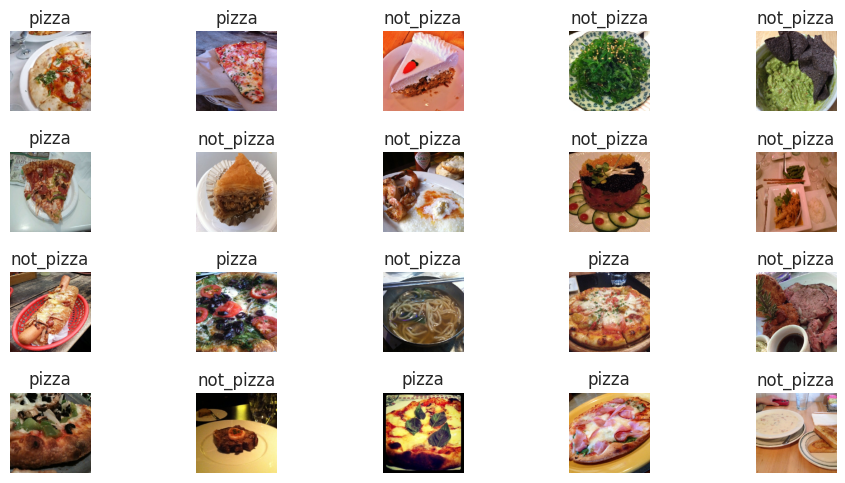

In [ ]:
def plot_random_images():
    images, labels = train_data.next()
    labels = labels.astype('int32')
    i = 1

    plt.figure(figsize = (10, 5))

    for image, label in zip(images, labels):
        plt.subplot(4, 5, i)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
        i += 1
        if i == 21:
            break

    plt.tight_layout()
    plt.show()

plot_random_images()

### melakukan identifikasi yang mana pizza dan not pizza dengan 20 foto random

In [65]:
model = tf.keras.Sequential([
            tf.keras.Input(shape = images[0].shape),
            tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation = 'relu'),
            tf.keras.layers.Dense(2, activation = 'softmax'),
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### melakukan model squential

In [66]:
classifier = model.fit(train_data, batch_size = 32,
                                 epochs = 5,
                                 validation_data = val_data,
                                 verbose = 1)

Epoch 1/5
40/40 [==============================] - 6s 110ms/step - loss: 1.3830 - accuracy: 0.6153 - val_loss: 0.6753 - val_accuracy: 0.6053
Epoch 2/5
40/40 [==============================] - 4s 92ms/step - loss: 0.5813 - accuracy: 0.7059 - val_loss: 0.6083 - val_accuracy: 0.6316
Epoch 3/5
40/40 [==============================] - 5s 136ms/step - loss: 0.4398 - accuracy: 0.7981 - val_loss: 0.6636 - val_accuracy: 0.6316
Epoch 4/5
40/40 [==============================] - 4s 90ms/step - loss: 0.2608 - accuracy: 0.9006 - val_loss: 0.7378 - val_accuracy: 0.6579
Epoch 5/5
40/40 [==============================] - 4s 90ms/step - loss: 0.1190 - accuracy: 0.9618 - val_loss: 0.9202 - val_accuracy: 0.6842


### melakukan modeling data untuk mencari validasi loss dan akurasi

In [67]:
model.evaluate(val_data)

2/2 [==============================] - 0s 13ms/step - loss: 0.9202 - accuracy: 0.6842


[0.9201894998550415, 0.6842105388641357]

### meng evaluasi data validasi

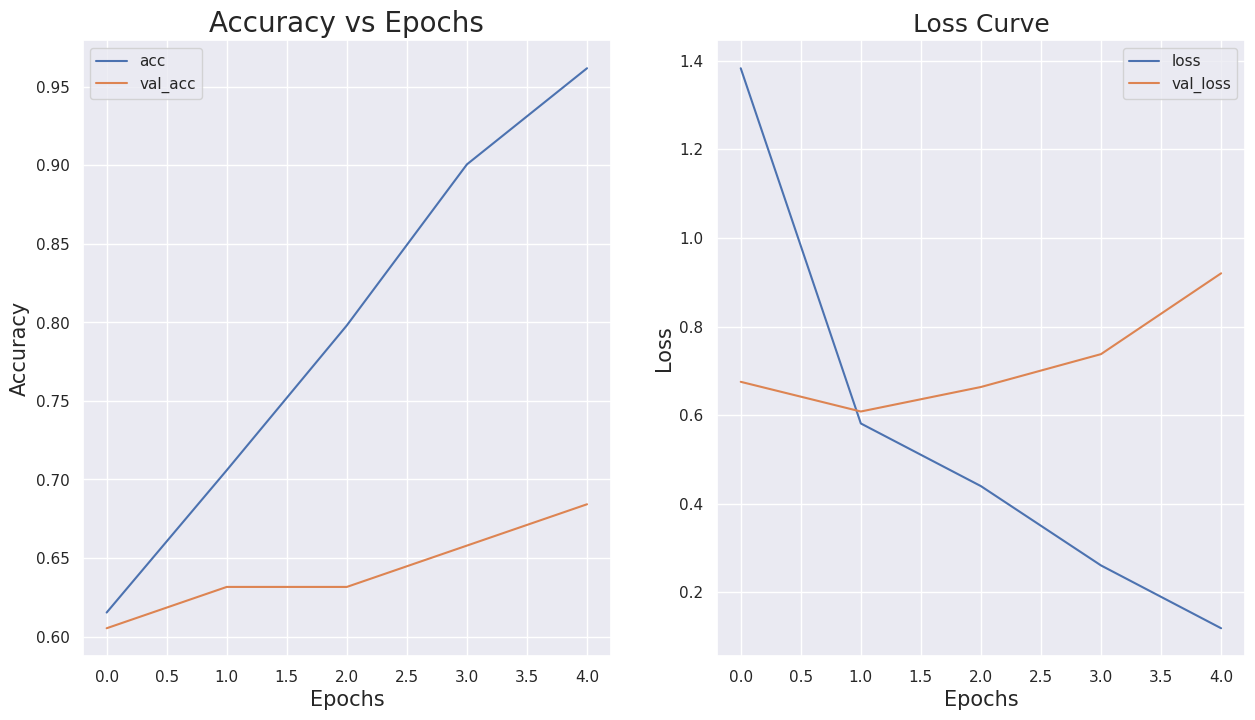

In [68]:
def model_performance_graphs():

    fig, axes = plt.subplots(1, 2, figsize = (15, 8))

    axes[0].plot(classifier.epoch, classifier.history['accuracy'], label = 'acc')
    axes[0].plot(classifier.epoch, classifier.history['val_accuracy'], label = 'val_acc')
    axes[0].set_title('Accuracy vs Epochs', fontsize = 20)
    axes[0].set_xlabel('Epochs', fontsize = 15)
    axes[0].set_ylabel('Accuracy', fontsize = 15)
    axes[0].legend()

    axes[1].plot(classifier.epoch, classifier.history['loss'], label = 'loss')
    axes[1].plot(classifier.epoch, classifier.history['val_loss'], label="val_loss")
    axes[1].set_title("Loss Curve",fontsize=18)
    axes[1].set_xlabel("Epochs",fontsize=15)
    axes[1].set_ylabel("Loss",fontsize=15)
    axes[1].legend()

    plt.show()

model_performance_graphs()

### membuat grafik hasil dari modeling data